<a href="https://colab.research.google.com/github/skywalker0803r/autorch/blob/main/examples/wadda_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from autorch import transferlearning
import torch
from torch import nn
from torch.autograd import Function
from torch import optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import xgboost
from sklearn.multioutput import MultiOutputRegressor
from sklearn.utils import shuffle
import warnings 
warnings.simplefilter('ignore')

In [7]:
def normalize(x):
  return x/x.sum(axis=1).values.reshape(-1,1)

# Load Data

In [8]:
src_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/train_4565.csv',index_col=0))
tgt_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/test_250.csv',index_col=0))

# get columns_name
x_col = ['T10','T50','T90','N+A']
N_col = ['C5N','C6N','C6A','C7N','C7A','C8N','C8A','C9N','C9A','C10N','C10A']
P_col = ['C5NP','C5IP','C6NP','C6IP','C7NP','C7IP','C8NP','C8IP','C9NP','C9IP','C10NP','C10IP']
y_col = src_data.drop(x_col,axis=1).columns.tolist()

# split some data for final testing
tgt_data,final_test_data = tgt_data.iloc[:200],tgt_data.iloc[200:]

# instance WADDA model

In [9]:
src_x,src_y = src_data[x_col],src_data[y_col]
tgt_x,tgt_y = tgt_data[x_col],tgt_data[y_col]
model = transferlearning.WADDA(src_x,src_y,tgt_x,tgt_y)

# Fit Xgboost

In [10]:
xgb_200 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(tgt_x,tgt_y)
xgb_4765 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(src_x.append(tgt_x),src_y.append(tgt_y))

# Fit WADDA

start train


  1%|          | 21/3000 [00:00<00:42, 69.46it/s]

ep:0 loss:3.8631930351257324


  5%|▍         | 139/3000 [00:00<00:15, 187.27it/s]

ep:100 loss:3.3072755336761475


  8%|▊         | 225/3000 [00:01<00:13, 201.41it/s]

ep:200 loss:1.2797528505325317


 10%|█         | 313/3000 [00:01<00:13, 198.13it/s]

ep:300 loss:0.8838871717453003


 14%|█▍        | 417/3000 [00:02<00:14, 172.62it/s]

ep:400 loss:0.7457883954048157


 18%|█▊        | 534/3000 [00:03<00:13, 180.69it/s]

ep:500 loss:0.6492558121681213


 21%|██        | 622/3000 [00:03<00:11, 199.65it/s]

ep:600 loss:0.5384671092033386


 24%|██▍       | 728/3000 [00:04<00:12, 188.74it/s]

ep:700 loss:0.4074937701225281


 27%|██▋       | 817/3000 [00:04<00:10, 209.10it/s]

ep:800 loss:0.40612679719924927


 31%|███       | 928/3000 [00:05<00:11, 188.23it/s]

ep:900 loss:0.40397408604621887


 34%|███▍      | 1017/3000 [00:05<00:11, 177.35it/s]

ep:1000 loss:0.3613690137863159


 37%|███▋      | 1122/3000 [00:06<00:13, 142.56it/s]

ep:1100 loss:0.28530699014663696


 41%|████      | 1225/3000 [00:07<00:12, 137.73it/s]

ep:1200 loss:0.3347931504249573


 45%|████▍     | 1338/3000 [00:07<00:09, 172.46it/s]

ep:1300 loss:0.3275569975376129


 47%|████▋     | 1423/3000 [00:08<00:08, 193.23it/s]

ep:1400 loss:0.2896931767463684


 51%|█████     | 1527/3000 [00:08<00:08, 179.97it/s]

ep:1500 loss:0.2692357897758484


 55%|█████▍    | 1635/3000 [00:09<00:06, 207.20it/s]

ep:1600 loss:0.358450323343277


 58%|█████▊    | 1739/3000 [00:10<00:06, 184.44it/s]

ep:1700 loss:0.226843923330307


 61%|██████    | 1821/3000 [00:10<00:06, 189.71it/s]

ep:1800 loss:0.29980239272117615


 64%|██████▍   | 1924/3000 [00:11<00:06, 158.97it/s]

ep:1900 loss:0.37299206852912903


 69%|██████▊   | 2058/3000 [00:11<00:03, 250.71it/s]

ep:2000 loss:0.3399491012096405


 72%|███████▏  | 2158/3000 [00:12<00:02, 300.31it/s]

ep:2100 loss:0.4002206325531006


 76%|███████▌  | 2269/3000 [00:12<00:02, 343.85it/s]

ep:2200 loss:0.33109280467033386


 78%|███████▊  | 2349/3000 [00:12<00:01, 369.82it/s]

ep:2300 loss:0.2859044373035431


 82%|████████▏ | 2465/3000 [00:12<00:01, 369.97it/s]

ep:2400 loss:0.28873929381370544


 85%|████████▍ | 2543/3000 [00:13<00:01, 370.75it/s]

ep:2500 loss:0.2796427309513092


 89%|████████▊ | 2657/3000 [00:13<00:00, 363.47it/s]

ep:2600 loss:0.24925526976585388


 92%|█████████▏| 2774/3000 [00:13<00:00, 377.40it/s]

ep:2700 loss:0.2843848168849945


 95%|█████████▍| 2849/3000 [00:13<00:00, 367.97it/s]

ep:2800 loss:0.253272145986557


 99%|█████████▊| 2960/3000 [00:14<00:00, 352.77it/s]

ep:2900 loss:0.2292587012052536


100%|██████████| 3000/3000 [00:14<00:00, 208.52it/s]


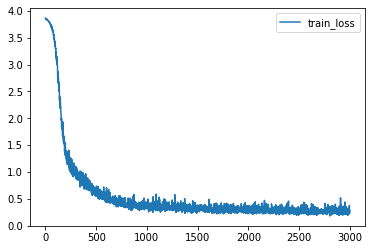

  0%|          | 30/10000 [00:00<01:10, 140.98it/s]

ep:0 d_loss:-0.11761663109064102 t_loss:-0.07709477841854095 r_loss:2.629530906677246


  1%|          | 121/10000 [00:00<01:07, 146.16it/s]

ep:100 d_loss:-0.12625747919082642 t_loss:-0.5690511465072632 r_loss:1.4509810209274292


  2%|▏         | 212/10000 [00:01<01:34, 103.45it/s]

ep:200 d_loss:-0.0033552944660186768 t_loss:-0.4271485209465027 r_loss:1.091279149055481


  3%|▎         | 328/10000 [00:02<01:07, 143.92it/s]

ep:300 d_loss:-0.03150593489408493 t_loss:-0.008724148385226727 r_loss:0.9150336980819702


  4%|▍         | 420/10000 [00:03<01:07, 141.28it/s]

ep:400 d_loss:-0.06415757536888123 t_loss:0.1059454157948494 r_loss:0.9831877946853638


  5%|▌         | 525/10000 [00:03<01:07, 140.76it/s]

ep:500 d_loss:-0.013704031705856323 t_loss:-0.05182280018925667 r_loss:0.7421365976333618


  6%|▌         | 617/10000 [00:04<01:05, 143.43it/s]

ep:600 d_loss:-0.03605823963880539 t_loss:-0.029993051663041115 r_loss:0.7447937726974487


  7%|▋         | 720/10000 [00:05<01:06, 139.40it/s]

ep:700 d_loss:-0.03384324163198471 t_loss:-0.02661353349685669 r_loss:0.7169452905654907


  8%|▊         | 822/10000 [00:05<01:05, 140.47it/s]

ep:800 d_loss:-0.03548239916563034 t_loss:0.01804949901998043 r_loss:0.7411845922470093


  9%|▉         | 927/10000 [00:06<01:02, 144.62it/s]

ep:900 d_loss:-0.04270966723561287 t_loss:-0.017803460359573364 r_loss:0.6847123503684998


 10%|█         | 1016/10000 [00:07<01:05, 137.44it/s]

ep:1000 d_loss:-0.027468524873256683 t_loss:-0.041042376309633255 r_loss:0.6436783075332642


 11%|█         | 1119/10000 [00:08<01:02, 142.65it/s]

ep:1100 d_loss:-0.04197906702756882 t_loss:0.04230333864688873 r_loss:0.6703494787216187


 12%|█▏        | 1223/10000 [00:08<01:06, 131.03it/s]

ep:1200 d_loss:-0.03961028903722763 t_loss:-0.024467570707201958 r_loss:0.6710671782493591


 13%|█▎        | 1324/10000 [00:09<01:03, 135.95it/s]

ep:1300 d_loss:-0.03192330151796341 t_loss:-0.01799234189093113 r_loss:0.5809304714202881


 14%|█▍        | 1428/10000 [00:10<01:00, 140.77it/s]

ep:1400 d_loss:-0.03698796033859253 t_loss:-0.0021350840106606483 r_loss:0.5699569582939148


 15%|█▌        | 1516/10000 [00:11<01:01, 136.99it/s]

ep:1500 d_loss:-0.0337432399392128 t_loss:-0.0328935831785202 r_loss:0.5784968733787537


 16%|█▌        | 1620/10000 [00:11<01:00, 139.25it/s]

ep:1600 d_loss:-0.0403933972120285 t_loss:-0.004145522136241198 r_loss:0.5742785334587097


 17%|█▋        | 1720/10000 [00:12<00:59, 138.78it/s]

ep:1700 d_loss:-0.03028097376227379 t_loss:-0.051751505583524704 r_loss:0.5432870388031006


 18%|█▊        | 1824/10000 [00:13<00:57, 141.70it/s]

ep:1800 d_loss:-0.03609137609601021 t_loss:0.009921620599925518 r_loss:0.5263685584068298


 19%|█▉        | 1928/10000 [00:13<00:58, 137.35it/s]

ep:1900 d_loss:-0.036814749240875244 t_loss:0.00017755200678948313 r_loss:0.524690568447113


 20%|██        | 2018/10000 [00:14<00:57, 139.39it/s]

ep:2000 d_loss:-0.03718433156609535 t_loss:-0.017411313951015472 r_loss:0.498442679643631


 21%|██        | 2122/10000 [00:15<00:57, 137.54it/s]

ep:2100 d_loss:-0.040748149156570435 t_loss:-0.0007669919868931174 r_loss:0.4788464307785034


 22%|██▏       | 2223/10000 [00:16<00:56, 137.79it/s]

ep:2200 d_loss:-0.03458067774772644 t_loss:-0.013078784570097923 r_loss:0.472677618265152


 23%|██▎       | 2324/10000 [00:16<00:54, 139.86it/s]

ep:2300 d_loss:-0.03202180564403534 t_loss:-0.025407930836081505 r_loss:0.5326870679855347


 24%|██▍       | 2427/10000 [00:17<00:53, 142.59it/s]

ep:2400 d_loss:-0.03833644837141037 t_loss:0.01119927130639553 r_loss:0.47548994421958923


 25%|██▌       | 2517/10000 [00:18<00:52, 141.61it/s]

ep:2500 d_loss:-0.028338013216853142 t_loss:-0.024519098922610283 r_loss:0.45458224415779114


 26%|██▌       | 2622/10000 [00:18<00:51, 142.45it/s]

ep:2600 d_loss:-0.04305242747068405 t_loss:-0.004915101453661919 r_loss:0.45256128907203674


 27%|██▋       | 2711/10000 [00:19<00:57, 125.79it/s]

ep:2700 d_loss:-0.03827741742134094 t_loss:-0.0073211658746004105 r_loss:0.44241636991500854


 28%|██▊       | 2828/10000 [00:20<01:04, 111.37it/s]

ep:2800 d_loss:-0.03278004750609398 t_loss:-0.0029842336662113667 r_loss:0.4567467272281647


 29%|██▉       | 2915/10000 [00:21<00:54, 129.54it/s]

ep:2900 d_loss:-0.029873989522457123 t_loss:-0.03496585413813591 r_loss:0.41914674639701843


 30%|███       | 3019/10000 [00:22<00:50, 138.10it/s]

ep:3000 d_loss:-0.034099921584129333 t_loss:-0.018710190430283546 r_loss:0.4584066569805145


 31%|███       | 3121/10000 [00:23<00:49, 139.46it/s]

ep:3100 d_loss:-0.039909008890390396 t_loss:-0.007815899327397346 r_loss:0.45332634449005127


 32%|███▏      | 3225/10000 [00:23<00:47, 141.48it/s]

ep:3200 d_loss:-0.03350960835814476 t_loss:-0.010762587189674377 r_loss:0.41547226905822754


 33%|███▎      | 3330/10000 [00:24<00:47, 141.69it/s]

ep:3300 d_loss:-0.034517452120780945 t_loss:-0.011283145286142826 r_loss:0.4557468593120575


 34%|███▍      | 3419/10000 [00:25<00:46, 142.39it/s]

ep:3400 d_loss:-0.03822534903883934 t_loss:0.006885888054966927 r_loss:0.4341292977333069


 35%|███▌      | 3521/10000 [00:25<00:46, 140.79it/s]

ep:3500 d_loss:-0.035852767527103424 t_loss:-0.01143818162381649 r_loss:0.40828877687454224


 36%|███▋      | 3626/10000 [00:26<00:45, 140.94it/s]

ep:3600 d_loss:-0.043498724699020386 t_loss:0.011911672540009022 r_loss:0.4115222990512848


 37%|███▋      | 3717/10000 [00:27<00:43, 145.80it/s]

ep:3700 d_loss:-0.0314384400844574 t_loss:-0.013166083954274654 r_loss:0.4864170253276825


 38%|███▊      | 3822/10000 [00:28<00:43, 142.56it/s]

ep:3800 d_loss:-0.029550764709711075 t_loss:-0.018144531175494194 r_loss:0.4019254744052887


 39%|███▉      | 3926/10000 [00:28<00:42, 141.46it/s]

ep:3900 d_loss:-0.038506198674440384 t_loss:-0.021876031532883644 r_loss:0.42778122425079346


 40%|████      | 4016/10000 [00:29<00:43, 137.19it/s]

ep:4000 d_loss:-0.03099130466580391 t_loss:-0.006635196041315794 r_loss:0.3729361295700073


 41%|████      | 4120/10000 [00:30<00:40, 144.59it/s]

ep:4100 d_loss:-0.030653655529022217 t_loss:-0.014059367589652538 r_loss:0.43801289796829224


 42%|████▏     | 4222/10000 [00:30<00:41, 137.80it/s]

ep:4200 d_loss:-0.03663863241672516 t_loss:0.000980352982878685 r_loss:0.35539743304252625


 43%|████▎     | 4326/10000 [00:31<00:41, 138.38it/s]

ep:4300 d_loss:-0.034779079258441925 t_loss:-0.00047250892384909093 r_loss:0.44582122564315796


 44%|████▍     | 4416/10000 [00:32<00:39, 142.78it/s]

ep:4400 d_loss:-0.03719543293118477 t_loss:0.01052911952137947 r_loss:0.3953997492790222


 45%|████▌     | 4521/10000 [00:33<00:40, 134.20it/s]

ep:4500 d_loss:-0.038979463279247284 t_loss:-0.009175024926662445 r_loss:0.4110611081123352


 46%|████▌     | 4624/10000 [00:33<00:38, 139.18it/s]

ep:4600 d_loss:-0.03078283555805683 t_loss:0.0023517305962741375 r_loss:0.44018039107322693


 47%|████▋     | 4726/10000 [00:34<00:37, 139.08it/s]

ep:4700 d_loss:-0.03849925845861435 t_loss:-0.017400022596120834 r_loss:0.39813822507858276


 48%|████▊     | 4827/10000 [00:35<00:37, 138.97it/s]

ep:4800 d_loss:-0.0358559675514698 t_loss:0.0027663582004606724 r_loss:0.41780713200569153


 49%|████▉     | 4929/10000 [00:36<00:35, 142.32it/s]

ep:4900 d_loss:-0.03574194759130478 t_loss:-0.036439694464206696 r_loss:0.36728569865226746


 50%|█████     | 5019/10000 [00:36<00:37, 133.63it/s]

ep:5000 d_loss:-0.037280064076185226 t_loss:-0.007880611345171928 r_loss:0.39218953251838684


 51%|█████     | 5122/10000 [00:37<00:34, 141.95it/s]

ep:5100 d_loss:-0.03487183526158333 t_loss:-0.0033242558129131794 r_loss:0.4348911643028259


 52%|█████▏    | 5210/10000 [00:38<00:34, 139.72it/s]

ep:5200 d_loss:-0.042116954922676086 t_loss:0.023765621706843376 r_loss:0.42376625537872314


 53%|█████▎    | 5303/10000 [00:39<00:44, 106.42it/s]

ep:5300 d_loss:-0.04032069072127342 t_loss:-0.0025407839566469193 r_loss:0.37895825505256653


 54%|█████▍    | 5408/10000 [00:40<00:41, 109.66it/s]

ep:5400 d_loss:-0.03579089418053627 t_loss:-0.013806191273033619 r_loss:0.41821250319480896


 55%|█████▌    | 5522/10000 [00:42<00:36, 121.30it/s]

ep:5500 d_loss:-0.037940893322229385 t_loss:-0.007971093989908695 r_loss:0.46829497814178467


 56%|█████▌    | 5623/10000 [00:42<00:33, 130.71it/s]

ep:5600 d_loss:-0.03880361095070839 t_loss:-0.0028284331783652306 r_loss:0.41340765357017517


 57%|█████▋    | 5724/10000 [00:43<00:32, 131.06it/s]

ep:5700 d_loss:-0.037938281893730164 t_loss:0.0009073946857824922 r_loss:0.35225486755371094


 58%|█████▊    | 5826/10000 [00:44<00:30, 137.69it/s]

ep:5800 d_loss:-0.03866928815841675 t_loss:0.017145218327641487 r_loss:0.43664437532424927


 59%|█████▉    | 5930/10000 [00:45<00:28, 142.94it/s]

ep:5900 d_loss:-0.038382839411497116 t_loss:0.005163865629583597 r_loss:0.3936895430088043


 60%|██████    | 6020/10000 [00:45<00:28, 141.24it/s]

ep:6000 d_loss:-0.035732924938201904 t_loss:-0.012333940714597702 r_loss:0.41291552782058716


 61%|██████▏   | 6125/10000 [00:46<00:27, 140.53it/s]

ep:6100 d_loss:-0.03540167957544327 t_loss:-0.016936082392930984 r_loss:0.35977837443351746


 62%|██████▏   | 6216/10000 [00:47<00:26, 144.07it/s]

ep:6200 d_loss:-0.031233297660946846 t_loss:-0.018262512981891632 r_loss:0.37384647130966187


 63%|██████▎   | 6321/10000 [00:47<00:27, 133.92it/s]

ep:6300 d_loss:-0.03671257942914963 t_loss:-0.0013856919249519706 r_loss:0.3479998707771301


 64%|██████▍   | 6425/10000 [00:48<00:25, 142.50it/s]

ep:6400 d_loss:-0.032137610018253326 t_loss:-0.01768995076417923 r_loss:0.3832671642303467


 65%|██████▌   | 6528/10000 [00:49<00:24, 142.91it/s]

ep:6500 d_loss:-0.021330056712031364 t_loss:-0.02487475797533989 r_loss:0.42616215348243713


 66%|██████▌   | 6618/10000 [00:50<00:24, 140.73it/s]

ep:6600 d_loss:-0.020985888317227364 t_loss:-0.027722179889678955 r_loss:0.3769088089466095


 67%|██████▋   | 6723/10000 [00:50<00:22, 143.15it/s]

ep:6700 d_loss:-0.0253157876431942 t_loss:-0.007077997550368309 r_loss:0.3826896846294403


 68%|██████▊   | 6829/10000 [00:51<00:22, 142.29it/s]

ep:6800 d_loss:-0.02402334287762642 t_loss:-0.0006553083658218384 r_loss:0.39159125089645386


 69%|██████▉   | 6919/10000 [00:52<00:21, 140.55it/s]

ep:6900 d_loss:-0.022208524867892265 t_loss:-0.028239332139492035 r_loss:0.3680737614631653


 70%|███████   | 7024/10000 [00:52<00:21, 139.95it/s]

ep:7000 d_loss:-0.019644014537334442 t_loss:-0.020193511620163918 r_loss:0.42304593324661255


 71%|███████   | 7115/10000 [00:53<00:20, 140.15it/s]

ep:7100 d_loss:-0.02540263906121254 t_loss:-0.015451577492058277 r_loss:0.40351760387420654


 72%|███████▏  | 7218/10000 [00:54<00:20, 137.26it/s]

ep:7200 d_loss:-0.02766435593366623 t_loss:0.005933201871812344 r_loss:0.39962294697761536


 73%|███████▎  | 7319/10000 [00:55<00:19, 137.25it/s]

ep:7300 d_loss:-0.02457400970160961 t_loss:-0.027417924255132675 r_loss:0.3486754894256592


 74%|███████▍  | 7421/10000 [00:55<00:18, 138.84it/s]

ep:7400 d_loss:-0.022805772721767426 t_loss:-0.004328598268330097 r_loss:0.3589305579662323


 75%|███████▌  | 7520/10000 [00:56<00:19, 129.51it/s]

ep:7500 d_loss:-0.021653320640325546 t_loss:-0.009599859826266766 r_loss:0.3585306704044342


 76%|███████▌  | 7623/10000 [00:57<00:17, 138.14it/s]

ep:7600 d_loss:-0.027799470350146294 t_loss:0.0021593004930764437 r_loss:0.3638925850391388


 77%|███████▋  | 7724/10000 [00:58<00:16, 138.55it/s]

ep:7700 d_loss:-0.02776332199573517 t_loss:-0.007352197542786598 r_loss:0.3861421048641205


 78%|███████▊  | 7823/10000 [00:58<00:16, 134.78it/s]

ep:7800 d_loss:-0.022984899580478668 t_loss:-0.01835837960243225 r_loss:0.37893399596214294


 79%|███████▉  | 7925/10000 [00:59<00:15, 134.25it/s]

ep:7900 d_loss:-0.022274887189269066 t_loss:-0.011636524461209774 r_loss:0.3511197865009308


 80%|████████  | 8027/10000 [01:00<00:14, 133.87it/s]

ep:8000 d_loss:-0.018243076279759407 t_loss:-0.01899069920182228 r_loss:0.35336560010910034


 81%|████████▏ | 8131/10000 [01:01<00:13, 143.32it/s]

ep:8100 d_loss:-0.02268291264772415 t_loss:-0.020535599440336227 r_loss:0.3414074778556824


 82%|████████▏ | 8222/10000 [01:01<00:12, 141.35it/s]

ep:8200 d_loss:-0.02376037836074829 t_loss:-0.004024120047688484 r_loss:0.3757169246673584


 83%|████████▎ | 8327/10000 [01:02<00:11, 139.42it/s]

ep:8300 d_loss:-0.02659893035888672 t_loss:-0.008252465166151524 r_loss:0.3899204134941101


 84%|████████▍ | 8416/10000 [01:03<00:11, 142.31it/s]

ep:8400 d_loss:-0.01786370575428009 t_loss:-0.0324883796274662 r_loss:0.3638243079185486


 85%|████████▌ | 8518/10000 [01:03<00:10, 136.78it/s]

ep:8500 d_loss:-0.023543687537312508 t_loss:-0.023410826921463013 r_loss:0.38472113013267517


 86%|████████▌ | 8618/10000 [01:04<00:10, 133.06it/s]

ep:8600 d_loss:-0.028327923268079758 t_loss:0.0075184679590165615 r_loss:0.3450338542461395


 87%|████████▋ | 8719/10000 [01:05<00:09, 136.48it/s]

ep:8700 d_loss:-0.02288905158638954 t_loss:-0.007987450808286667 r_loss:0.36364954710006714


 88%|████████▊ | 8818/10000 [01:06<00:08, 135.33it/s]

ep:8800 d_loss:-0.027032503858208656 t_loss:-0.005304916296154261 r_loss:0.3541122078895569


 89%|████████▉ | 8916/10000 [01:06<00:08, 129.25it/s]

ep:8900 d_loss:-0.026358922943472862 t_loss:-0.00031760960700921714 r_loss:0.3759634494781494


 90%|█████████ | 9017/10000 [01:07<00:07, 137.13it/s]

ep:9000 d_loss:-0.023448091000318527 t_loss:-0.008842907845973969 r_loss:0.3676619231700897


 91%|█████████ | 9117/10000 [01:08<00:06, 134.28it/s]

ep:9100 d_loss:-0.02409319207072258 t_loss:0.009248830378055573 r_loss:0.3426712453365326


 92%|█████████▏| 9216/10000 [01:09<00:05, 138.29it/s]

ep:9200 d_loss:-0.02583511359989643 t_loss:-0.0016832492547109723 r_loss:0.3829677700996399


 93%|█████████▎| 9315/10000 [01:09<00:05, 133.00it/s]

ep:9300 d_loss:-0.02077610045671463 t_loss:-0.02061363123357296 r_loss:0.35902872681617737


 94%|█████████▍| 9415/10000 [01:10<00:04, 132.96it/s]

ep:9400 d_loss:-0.02755439095199108 t_loss:-0.003298158524557948 r_loss:0.3676196336746216


 95%|█████████▌| 9517/10000 [01:11<00:03, 140.70it/s]

ep:9500 d_loss:-0.014619793742895126 t_loss:-0.04016623646020889 r_loss:0.3739292323589325


 96%|█████████▌| 9620/10000 [01:12<00:02, 138.35it/s]

ep:9600 d_loss:-0.032225992530584335 t_loss:0.019000615924596786 r_loss:0.36123794317245483


 97%|█████████▋| 9721/10000 [01:12<00:02, 132.13it/s]

ep:9700 d_loss:-0.030739568173885345 t_loss:-0.006887737661600113 r_loss:0.2928127646446228


 98%|█████████▊| 9822/10000 [01:13<00:01, 134.16it/s]

ep:9800 d_loss:-0.021900691092014313 t_loss:-0.014610614627599716 r_loss:0.36528998613357544


 99%|█████████▉| 9920/10000 [01:14<00:00, 135.10it/s]

ep:9900 d_loss:-0.027660932391881943 t_loss:-0.008771021850407124 r_loss:0.36193951964378357


100%|██████████| 10000/10000 [01:14<00:00, 133.39it/s]


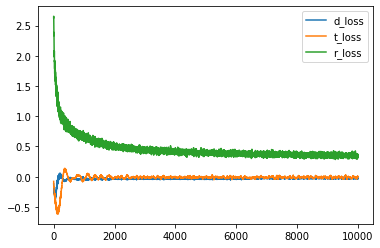

end train


In [11]:
model.train()

# model predict

In [12]:
x_test = final_test_data[x_col]
y_test = final_test_data[y_col]

In [13]:
adda_y_hat = model.predict(x_test)
adda_y_hat.index = x_test.index
xgb_200_y_hat = pd.DataFrame(xgb_200.predict(x_test),index=x_test.index,columns=y_col)
xgb_4765_y_hat = pd.DataFrame(xgb_4765.predict(x_test),index=x_test.index,columns=y_col)

# evaluate

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def show_metrics(y_pred,y_real):
  res = pd.DataFrame(index=y_pred.columns,columns=['R2','RMSE','MAPE'])
  for i in y_pred.columns:
    res.loc[i,'R2'] = r2_score(y_real[i],y_pred[i])
    res.loc[i,'RMSE'] = np.sqrt(mean_squared_error(y_real[i],y_pred[i]))
    res.loc[i,'MAPE'] = mape(y_real[i],y_pred[i])
  res.loc['AVG'] = res.mean(axis=0)
  return res

In [15]:
adda_res = show_metrics(adda_y_hat,y_test)
adda_res.tail(1)

,R2,RMSE,MAPE
AVG,0.625167,1.085699,48.0978


In [16]:
xgb_200_res = show_metrics(xgb_200_y_hat,y_test)
xgb_200_res.tail(1)

,R2,RMSE,MAPE
AVG,-2.141483,3.275629,212.933398


In [17]:
xgb_4765_res = show_metrics(xgb_4765_y_hat,y_test)
xgb_4765_res.tail(1)

,R2,RMSE,MAPE
AVG,-12.261568,4.207822,304.712621


# check total == 100

In [18]:
adda_y_hat.sum(axis=1).head(5)

194     97.004753
66      97.827286
45      98.884705
57     100.346939
43     104.052444
dtype: float32

In [19]:
xgb_200_y_hat.sum(axis=1).head(5)

194    111.53331
66     111.53331
45     111.53331
57     111.53331
43     111.53331
dtype: float32

In [20]:
xgb_4765_y_hat.sum(axis=1).head(5)

194    110.827759
66     110.827759
45     110.827759
57     110.827759
43     110.827759
dtype: float32

# check total N+A == N+A

In [21]:
for i,j in zip(adda_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

49.1850471496582 50.458155945513326
49.315486907958984 51.17022053340536
34.5863037109375 32.70679274173852
43.63926696777344 44.41916626711675
40.511539459228516 36.53840051322756


In [22]:
for i,j in zip(xgb_200_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

65.24077606201172 50.458155945513326
65.24077606201172 51.17022053340536
65.24077606201172 32.70679274173852
65.24077606201172 44.41916626711675
65.24077606201172 36.53840051322756


In [23]:
for i,j in zip(xgb_4765_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

76.66719818115234 50.458155945513326
76.66719818115234 51.17022053340536
76.66719818115234 32.70679274173852
76.66719818115234 44.41916626711675
76.66719818115234 36.53840051322756


# convert_predict 後處理 以符合案子需求

In [24]:
x_test['P'] = 100 - x_test['N+A']

In [25]:
def convert_predict(y_pred):
  y_pred[N_col] = normalize(y_pred[N_col])*x_test[['N+A']].values
  y_pred[P_col] = normalize(y_pred[P_col])*x_test[['P']].values
  return y_pred

In [26]:
show_metrics(convert_predict(adda_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,0.666337,1.035867,47.60059


In [27]:
show_metrics(convert_predict(xgb_4765_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,-4.193525,3.54772,233.407542


In [28]:
show_metrics(convert_predict(xgb_200_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,-1.914396,2.856337,185.262811


# after convert check total and N+A sum

In [29]:
convert_predict(adda_y_hat).sum(axis=1).head(5)

194    100.0
66     100.0
45     100.0
57     100.0
43     100.0
dtype: float64

In [30]:
convert_predict(xgb_4765_y_hat).sum(axis=1).head(5)

194    100.0
66     100.0
45     100.0
57     100.0
43     100.0
dtype: float64

In [31]:
convert_predict(xgb_200_y_hat).sum(axis=1).head(5)

194    100.0
66     100.0
45     100.0
57     100.0
43     100.0
dtype: float64

In [32]:
for i,j in zip(adda_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

50.458155945513326 50.458155945513326
51.17022053340537 51.17022053340536
32.70679274173852 32.70679274173852
44.41916626711675 44.41916626711675
36.53840051322756 36.53840051322756


In [33]:
for i,j in zip(xgb_200_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

50.45815594551332 50.458155945513326
51.170220533405356 51.17022053340536
32.70679274173852 32.70679274173852
44.41916626711676 44.41916626711675
36.53840051322755 36.53840051322756


In [34]:
for i,j in zip(xgb_4765_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

50.45815594551333 50.458155945513326
51.17022053340536 51.17022053340536
32.70679274173852 32.70679274173852
44.41916626711675 44.41916626711675
36.538400513227565 36.53840051322756
